# **import libraries and EDA**

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler



In [66]:
df = pd.read_csv("C:/Users/ASUS/Desktop/University/first semester 2024/machine learning/room+occupancy+estimation/Occupancy_Estimation.csv")
df

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0            34        53        40      0.08      0.19      0.06      0.06   
1            33        53        40      0.93      0.05      0.06      0.06   
2            34        53        40      0.43      0.11      0.08      0.06   
3            34        53        40      0.41      0.10      0.10      0.09   
4            34        54        40      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0         390      0.769231       0       0                     1  
1         390      0.646154       0       0                     1  
2         390      0.519231       0       0                     1  
3         390      0.388462       0       0                     1  
4         390      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124     345      0.000000       0       0                     0  
10125     345      0.000000       0       0                     0  
10126     345      0.000000       0       0                     0  
10127     345      0.000000       0       0                     0  
10128     345      0.000000       0       0                     0  

[10129 rows x 19 columns]

In [67]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [68]:
df[['hour', 'minute' , 'second']] = df['Time'].str.split(":", expand = True)

df = df.drop(['Time'], axis = 1)

In [69]:
df[['Year', 'month' , 'day']] = df['Date'].str.split("/", expand = True)

df = df.drop(['Date'], axis = 1)

In [70]:
df

S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
0        24.94    24.75    24.56    25.38       121        34        53   
1        24.94    24.75    24.56    25.44       121        33        53   
2        25.00    24.75    24.50    25.44       121        34        53   
3        25.00    24.75    24.56    25.44       121        34        53   
4        25.00    24.75    24.56    25.44       121        34        54   
...        ...      ...      ...      ...       ...       ...       ...   
10124    25.06    25.13    24.69    25.31         6         7        33   
10125    25.06    25.06    24.69    25.25         6         7        34   
10126    25.13    25.06    24.69    25.25         6         7        34   
10127    25.13    25.06    24.69    25.25         6         7        34   
10128    25.13    25.06    24.69    25.25         6         7        34   

       S4_Light  S1_Sound  S2_Sound  ...  S5_CO2_Slope  S6_PIR  S7_PIR  \
0            40      0.08      0.19  ...      0.769231       0       0   
1            40      0.93      0.05  ...      0.646154       0       0   
2            40      0.43      0.11  ...      0.519231       0       0   
3            40      0.41      0.10  ...      0.388462       0       0   
4            40      0.18      0.06  ...      0.253846       0       0   
...         ...       ...       ...  ...           ...     ...     ...   
10124        22      0.09      0.04  ...      0.000000       0       0   
10125        22      0.07      0.05  ...      0.000000       0       0   
10126        22      0.11      0.05  ...      0.000000       0       0   
10127        22      0.08      0.08  ...      0.000000       0       0   
10128        22      0.08      0.05  ...      0.000000       0       0   

       Room_Occupancy_Count  hour  minute  second  Year month day  
0                         1    10      49      41  2017    12  22  
1                         1    10      50      12  2017    12  22  
2                         1    10      50      42  2017    12  22  
3                         1    10      51      13  2017    12  22  
4                         1    10      51      44  2017    12  22  
...                     ...   ...     ...     ...   ...   ...  ..  
10124                     0    08      58      07  2018    01  11  
10125                     0    08      58      37  2018    01  11  
10126                     0    08      59      08  2018    01  11  
10127                     0    08      59      39  2018    01  11  
10128                     0    09      00      09  2018    01  11  

[10129 rows x 23 columns]

In [71]:
df.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count',
       'hour', 'minute', 'second', 'Year', 'month', 'day'],
      dtype='object')

In [72]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['second'] = df['second'].astype(int)
df['minute'] = df['minute'].astype(int)
df['hour'] = df['hour'].astype(int)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [74]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

       ...  S5_CO2_Slope        S6_PIR        S7_PIR  Room_Occupancy_Count  \
count  ...  10129.000000  10129.000000  10129.000000          10129.000000   
mean   ...     -0.004830      0.090137      0.079574              0.398559   
std    ...      1.164990      0.286392      0.270645              0.893633   
min    ...     -6.296154      0.000000      0.000000              0.000000   
25%    ...     -0.046154      0.000000      0.000000              0.000000   
50%    ...      0.000000      0.000000      0.000000              0.000000   
75%    ...      0.000000      0.000000      0.000000              0.000000   
max    ...      8.980769      1.000000      1.000000              3.000000   

               hour        minute        second          Year         month  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      11.508639     29.551585     29.520881   2017.201896      9.779149   
std        7.228631     17.337115     17.320872      0.401434      4.415779   
min        0.000000      0.000000      0.000000   2017.000000      1.000000   
25%        5.000000     15.000000     15.000000   2017.000000     12.000000   
50%       12.000000     30.000000     30.000000   2017.000000     12.000000   
75%       18.000000     45.000000     45.000000   2017.000000     12.000000   
max       23.000000     59.000000     59.000000   2018.000000     12.000000   

                day  
count  10129.000000  
mean      21.093198  
std        5.456401  
min       10.000000  
25%       22.000000  
50%       23.000000  
75%       25.000000  
max       26.000000  

[8 rows x 23 columns]

# outliers and check the balanced

In [75]:
df.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count',
       'hour', 'minute', 'second', 'Year', 'month', 'day'],
      dtype='object')

In [76]:
balanced = df['Room_Occupancy_Count'].value_counts()
balanced

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

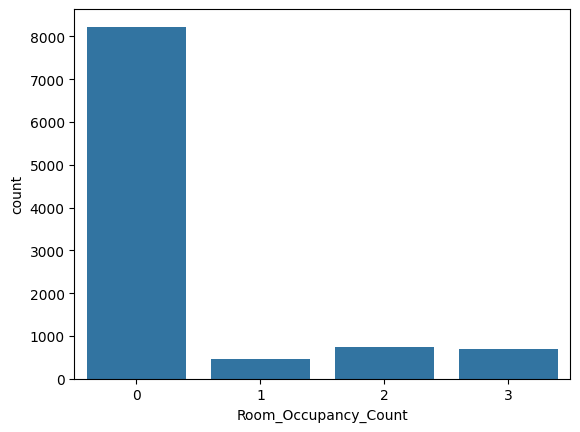

In [77]:
sns.countplot(x='Room_Occupancy_Count', data=df)
plt.show()

In [78]:
for i in df:
    fig = px.box(df, y=df[i])
    fig.show()
    print('\n')

# split the data

In [79]:
sc = StandardScaler()

In [80]:
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [83]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc1 = RandomForestClassifier(n_estimators=100)


In [85]:
# Perform cross-validation and print results
scores = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')  # Example for accuracy
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.99630086 1.         0.99876695 0.99382716 0.99753086 0.99876543
 0.9962963  1.         0.99876543 0.99753086]
Mean CV Accuracy: 0.9978


In [86]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
rfc_pred = rfc.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(confusion_matrix(y_test,rfc_pred))

[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  159    4]
 [   0    0    3  137]]


In [90]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.98      0.97      0.98       164
           3       0.97      0.98      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [91]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [92]:
CV_rfc = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [93]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [94]:
param_grid = {'criterion': ['gini'],  # Wrap 'gini' in a list
              'max_depth': [8],
              'max_features': ['sqrt'],
              'n_estimators': [500]}

In [95]:
CV_rfc = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'n_estimators': [500]})

In [96]:
rfc_pred1 = CV_rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, rfc_pred1)
conf_matrix

array([[1619,    0,    0,    0],
       [   0,  103,    0,    0],
       [   0,    1,  159,    4],
       [   0,    0,    4,  136]], dtype=int64)

In [97]:
print(classification_report(y_test,rfc_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.98      0.97      0.97       164
           3       0.97      0.97      0.97       140

    accuracy                           1.00      2026
   macro avg       0.98      0.99      0.98      2026
weighted avg       1.00      1.00      1.00      2026



# SVM

In [98]:
from sklearn.svm import SVC

In [99]:
# svm = SVC(kernel='linear', C=1000, random_state=42)
# svm = SVC(kernel='linear', C=1000, random_state=42)
svm = SVC()
svm2 = SVC()

In [100]:
svm.fit(X_train, y_train)

SVC()

In [101]:
# Perform cross-validation and print results
scores = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')  # Example for accuracy
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.99383477 0.99630086 0.99383477 0.99382716 0.99259259 0.99753086
 0.99012346 0.99753086 0.99259259 0.99753086]
Mean CV Accuracy: 0.9946


In [102]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.36%


In [103]:
param_grid = {
    'C': [0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],  # Only applicable for 'poly' kernel
    'gamma': ['scale', 'auto', 0.1],
    'shrinking': [True, False],
    'class_weight': [None, 'balanced'],}

In [104]:
CV_svm = GridSearchCV(estimator=svm2, param_grid=param_grid, cv=10)
CV_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1], 'class_weight': [None, 'balanced'],
                         'degree': [2, 3], 'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [105]:
CV_svm.best_params_


{'C': 0.1,
 'class_weight': None,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'shrinking': True}

In [106]:
param_grid

{'C': [0.1],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': [2, 3],
 'gamma': ['scale', 'auto', 0.1],
 'shrinking': [True, False],
 'class_weight': [None, 'balanced']}

In [107]:
CV_svm = GridSearchCV(estimator=svm2, param_grid=param_grid, cv=10)
CV_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1], 'class_weight': [None, 'balanced'],
                         'degree': [2, 3], 'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [108]:
CV_svm = CV_svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, CV_svm)
conf_matrix

array([[1617,    0,    0,    2],
       [   0,  103,    0,    0],
       [   0,    1,  159,    4],
       [   0,    0,    5,  135]], dtype=int64)

In [109]:
print(classification_report(y_test,CV_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.97      0.97       164
           3       0.96      0.96      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



# Gradient boost

In [110]:
grad_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
grad_model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
grad_model.fit(X_train, y_train)
gradpr = grad_model.predict(X_test)
print(gradpr)

[0 1 0 ... 0 0 0]


In [111]:
print(classification_report(y_test,gradpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.97      0.69      0.81       103
           2       0.84      0.90      0.87       164
           3       0.80      0.89      0.84       140

    accuracy                           0.97      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.97      0.97      0.97      2026



In [112]:
param_grid = {
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10 , 20 ,100]
}

In [113]:
CV_grad = GridSearchCV(estimator=grad_model1, param_grid=param_grid, cv=5)
CV_grad.fit(X_train, y_train)

In [ ]:
CV_grad.best_params_


{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100,
 'subsample': 0.85}

In [ ]:
param_grid = {'criterion': ['friedman_mse'],
 'max_depth': [8],
 'max_features': ['log2'],
 'n_estimators': [100],
 'subsample': [0.85]
}

In [ ]:
CV_grad = GridSearchCV(estimator=grad_model1, param_grid=param_grid, cv=5)
CV_grad.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [8],
                         'max_features': ['log2'], 'n_estimators': [100],
                         'subsample': [0.85]})

# XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, reg_lambda=1.0, reg_alpha=0.0,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model1 = XGBClassifier(n_estimators=100, learning_rate=0.1, reg_lambda=1.0, reg_alpha=0.0,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)
xgbpr = grad_model.predict(X_test)
print(xgbpr)

[0 1 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test,xgbpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.97      0.69      0.81       103
           2       0.84      0.90      0.87       164
           3       0.80      0.89      0.84       140

    accuracy                           0.97      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.97      0.97      0.97      2026



In [ ]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.4, 0.7, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
       }

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb_model1, param_grid=param_grid, cv=5)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0.5, 1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10],
                         'subsample': [0.4, 0.7, 1.0]})

In [ ]:
CV_xgb.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.7}

In [ ]:
param_grid = {
'colsample_bytree': [0.6],
 'gamma': [0.5],
 'max_depth': [5],
 'min_child_weight': [5],
 'subsample': [0.7]

}

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb_model1, param_grid=param_grid, cv=5)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6], 'gamma': [0.5],
                         'max_depth': [5], 'min_child_weight': [5],
                         'subsample': [0.7]})

# Gradient boost & XGBoost evaluation

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate Gradient Boosting
grad_metrics = evaluate_model(grad_model, X_test, y_test)
CV_grad_metrics = evaluate_model(CV_grad, X_test, y_test)

# Evaluate XGBoost
xgb_metrics = evaluate_model(xgb_model, X_test, y_test)



# Display the results
print("Gradient Boosting Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*grad_metrics))
print("Gradient Boosting Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*CV_grad_metrics))
print("XGBoost Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*xgb_metrics))

Gradient Boosting Metrics: Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
Gradient Boosting Metrics: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
XGBoost Metrics: Accuracy: 0.95, Precision: 0.95, Recall: 0.95, F1 Score: 0.95


# some references I used

https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python



https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost

https://scikit-learn.org/stable/modules/grid_search.html

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv